In [158]:
import matplotlib.pyplot as plt
import pandas as pd

In [159]:
df = pd.read_csv("../scraping/vacancies.csv")

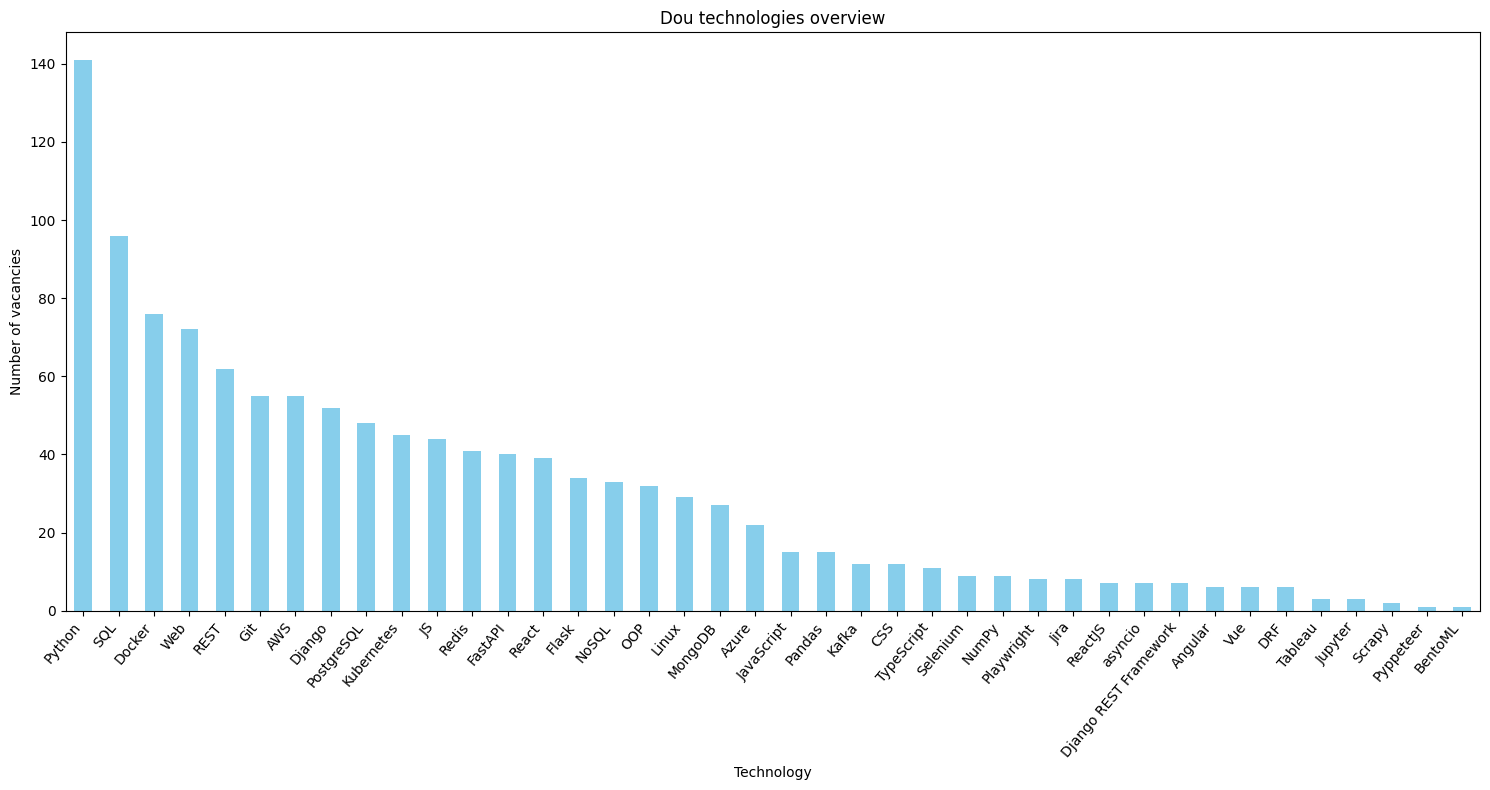

In [160]:
df["technologies"] = df["technologies"].str.split(", ")
df_technologies = df.explode("technologies")

technology_counts = df_technologies["technologies"].value_counts()

plt.figure(figsize=(15, 8))
technology_counts.plot(kind="bar", color="skyblue")
plt.title("Dou technologies overview")
plt.xlabel("Technology")
plt.ylabel("Number of vacancies")
plt.xticks(rotation=50, ha="right")
plt.tight_layout()
plt.savefig("images/technologies_histogram.png")
plt.show()

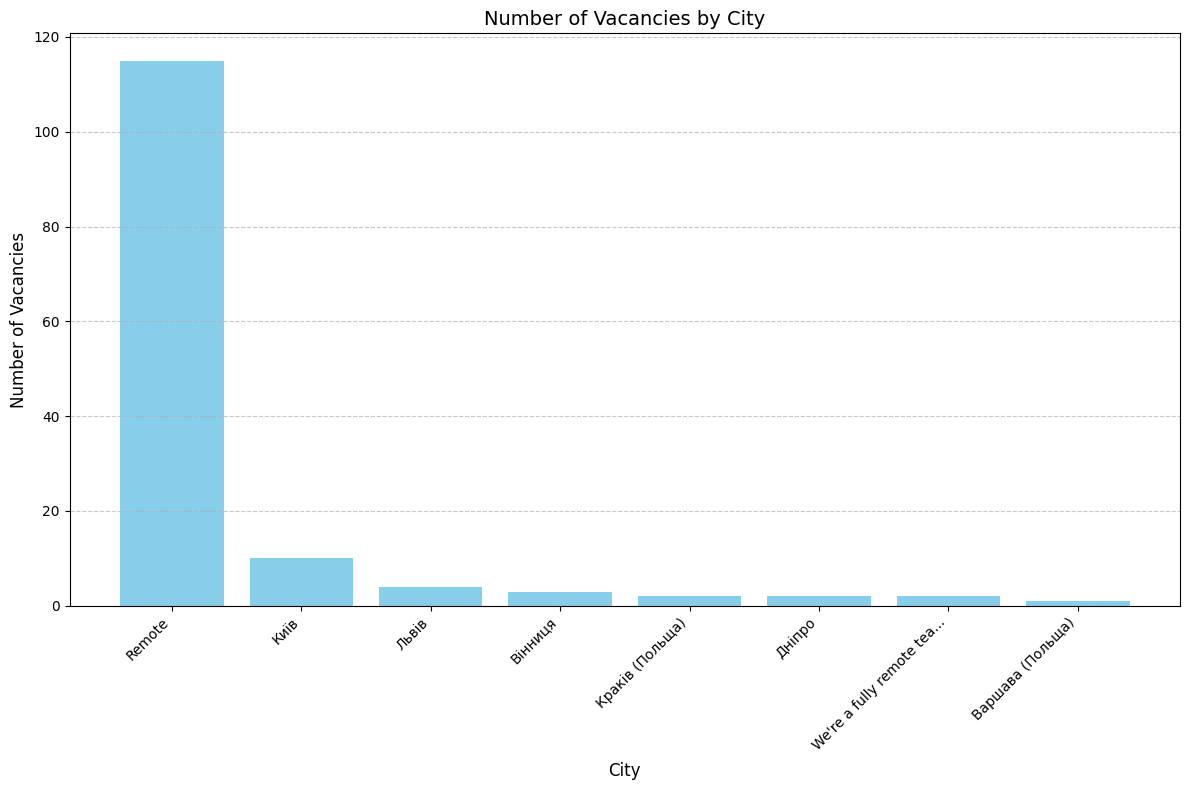

In [165]:
def normalize_city(city):
    if pd.isna(city):
        return "Unknown"
    city = str(city)
    if "віддалено" in city.lower():
        return "Remote"
    if "," in city:
        return city.split(",")[0].strip()
    if len(city) > 25:
        return city[:25] + "..."
    return city.strip()

df["normalized_city"] = df["city"].apply(normalize_city)

vacancy_count_by_city = df["normalized_city"].value_counts().reset_index()
vacancy_count_by_city.columns = ["city", "vacancy_count"]

vacancy_count_by_city = vacancy_count_by_city[vacancy_count_by_city["city"] != "Unknown"]
vacancy_count_by_city = vacancy_count_by_city.sort_values(by="vacancy_count", ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(
    vacancy_count_by_city["city"],
    vacancy_count_by_city["vacancy_count"],
    color="skyblue",
)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Vacancies", fontsize=12)
plt.title("Number of Vacancies by City", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("images/vacancies_by_city.png")
plt.show()

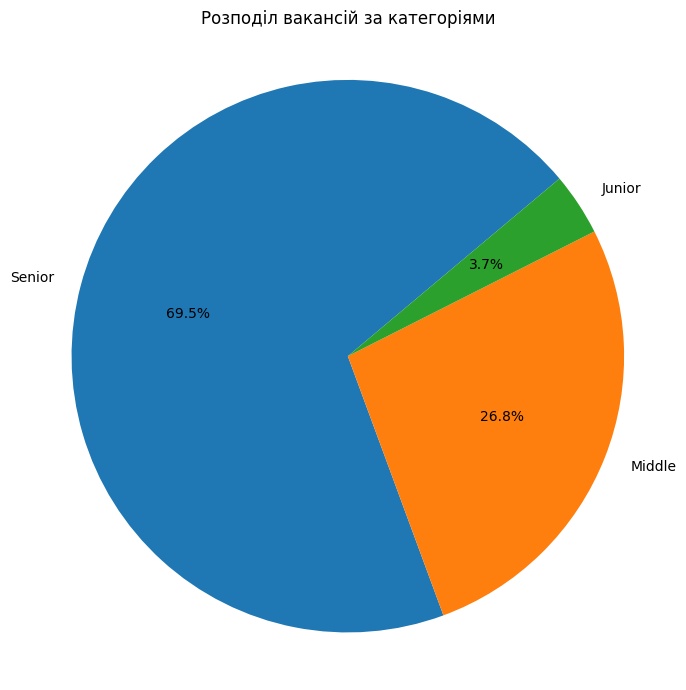

In [162]:
def extract_category(title):
    if "senior" in title.lower():
        return "Senior"
    elif "middle" in title.lower() or "mid" in title.lower():
        return "Middle"
    elif "junior" in title.lower():
        return "Junior"
    else:
        return "Other"

df["category"] = df["title"].apply(extract_category)

category_counts = df["category"].value_counts()

category_counts = category_counts[category_counts.index != "Other"]

plt.figure(figsize=(7, 7))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct="%1.1f%%",
    colors=plt.get_cmap("tab10").colors,
    startangle=40
)
plt.title("Розподіл вакансій за категоріями")
plt.axis("equal")

plt.tight_layout()
plt.savefig("images/vacancies_by_category_pie.png")
plt.show()

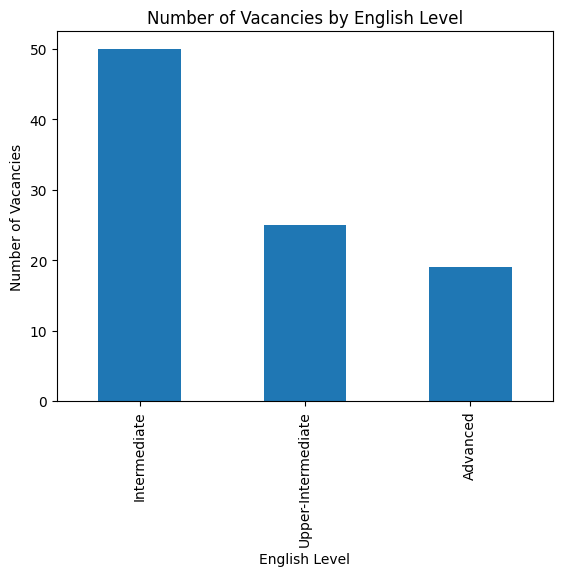

In [163]:
df['english_level'] = df['english_level'].fillna('').str.split(', ')
exploded_levels = df['english_level'].explode()
cleaned_levels = exploded_levels[exploded_levels != '']
english_level_counts = cleaned_levels.value_counts()
english_level_counts.plot(kind='bar')
plt.xlabel('English Level')
plt.ylabel('Number of Vacancies')
plt.title('Number of Vacancies by English Level')
plt.show()